In [1]:
# Bondi radius due to baryon accretion

%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
from module2 import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 

π = np.pi
Ω_cdm = 0.85
G = 6.67e-11                # in units of m^3⋅kg^−1⋅s^−2
M_solar = 1.989e30          # in units of kg
A = 1.495e11                # Astronomical unit
pc = 3.085e16               # in unist of meter. 
Λ = 2.036e-35               # in units of s⁻2
c = 3e8                     # in units of ms⁻¹
yr = 3.154e7                # in units of seconds
t_m = 13.78e9 * yr          #in units of yrs corresponding to t_0=13.78Gyr
t_eq = 1.5923e12            # in units of seconds
ρ_eq = 2.1548e-16           # in units of kg m^-3
ρ_meq = ρ_eq/2              # in units of kg m^-3
σ_eq = 0.005
a_eq = 2.9374e-4
M_H_eq = 3.1e16             #Horizon mass at z_eq in units of solar mass,




#Plot of the Bondi radius for PBHs of different PBH masses with speed of sound 
# c_s  as a function of the redshift.
# For x = x_bar, most probable value of a for PBH binaries merging today

def semi_mp(m_1, m_2, Δ_1, Δ_2): # For λ <<1 or up to the first order in λ.
    
    def f_(m):
        return f * P(m)
    
    def f_b(m_1, m_2):
        return  f_(m_1) + f_(m_2)
    
    m_b = m_1 + m_2
    
    def x̄(m_1, m_2, Δ_1, Δ_2):
        return (((3 * (m_1 + m_2))/(4 * π * ρ_eq * f_b(m_1, m_2) * np.sqrt(Δ_1 * Δ_2)))**(1/3))
    
    def X_mp(m_1, m_2, Δ_1, Δ_2):
        k_nohalo = 22.3821
        A_nohalo = ((ρ_eq**(4/3))*(G**3)*(k_nohalo**7))/(c**5)
        def B_nohalo(m_1,m_2,Δ_1,Δ_2):
            return (A_nohalo**(1/7)) * ((m_1 * m_2 * t_m)**(1/7)) * ((m_1 + m_2)**(-1/21)) * ((f_b(m_1,m_2))**(37/21)) * ((f**2 + 1.1994*(σ_eq**2))**(-1/2)) * ((Δ_1*Δ_2)**(37/42))
        return (2**(-21/74)) * ((B_nohalo(m_1, m_2, Δ_1, Δ_2))**(21/37))
    
    def λ_mp(m_1, m_2, Δ_1, Δ_2):   #λ_0
            return  X_mp(m_1, m_2, Δ_1, Δ_2)/(f_b(m_1,m_2) * np.sqrt(Δ_1*Δ_2))
    
    return  (0.0977* λ_mp(m_1, m_2, Δ_1, Δ_2) + 0.0068 * (λ_mp(m_1, m_2, Δ_1, Δ_2)**2)) * x̄(m_1,m_2,Δ_1,Δ_2) * (X_mp(m_1, m_2, Δ_1, Δ_2)**(1/3))




N = 6

bin_centres = np.geomspace(1e4, 1e-4, N)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, N)
m_2 = np.geomspace(1e4, 1e-4, N)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 

In [9]:
f_pbh = 2.53e-2     #choosen as per microlensing constraints
f = 0.85*f_pbh

def P(m):     #Powerlaw PBH mass distribution
    α = 1.6
    M = 1e-4      #in units of M☉, for PBHs mass range of m_min = 1e-4 M☉ - m_max = 100 M☉ .
    return ((α-1)/M) * ((m/M)**(-α))



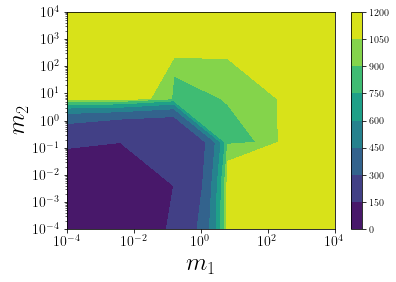

In [10]:
def z_circumbinary(m_1, m_2, Δ_1, Δ_2):
    z = np.geomspace(1e6, 1, 100000)
    z_list = z.tolist()
    r_B_list = np.zeros(len(z_list))
    semi =  semi_mp(m_1, m_2, Δ_1, Δ_2)
    for i, z in enumerate(z_list):
        m = (m_1 + m_2)
        r_B_list[i] = r_B(m, z)
    for k in  range(1,len(r_B_list)):
        z_c = z_list[k]
        if r_B_list[k] > semi:
            #print("z_c =", z_c)
            break
        
    z_cr = z_c
    #print("z_cr =", z_cr)
    
    return z_cr
    

z_countourf = np.zeros((N, N))
for k, (m_1, Δ_1)  in enumerate(zip(m_1_list, Δ_1_list)):
    m_1*= M_solar
    Δ_1*= M_solar
    for l, (m_2, Δ_2) in enumerate(zip(m_2_list, Δ_2_list)):
        m_2*= M_solar
        Δ_2*= M_solar
        z_countourf[k,l] = z_circumbinary(m_1, m_2, Δ_1, Δ_2)
        
M_1grid, M_2grid = np.meshgrid(m_1_list, m_2_list)

PLOT = plt.contourf(m_1_list, m_2_list, z_countourf)
plt.colorbar(PLOT)
plt.xlabel('$m_{1}$', fontsize = 25)
plt.ylabel('$m_{2} $', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.xscale('log')
plt.yscale('log')
plt.savefig('contr.pdf', bbox_inches = 'tight')
plt.show()